
## DESAFIO 2 - BOOTCAMP MACHINE LEARNING
Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Modelos Preditivos e Séries Temporais (MPT). Para este desafio será utilizada uma versão modificada do dataset “Wine Quality” disponível no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine). Esse dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco). Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. Existem informações como o teor alcoólico e nível de acidez.

### OBJETIVO: Exercitar os seguintes conceitos trabalhados no Módulo:

* Análise exploratória dos dados (EDA - Exploratory Data Analysis).
* Preparação dos dados.
* Comparação e ajuste de modelos de classificação.

In [96]:
# Bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# Carregando a base e visualizando os dados
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Quantas instâncias e atributos existem**

In [98]:
print(f'Colunas: {df.shape[1]}')
print(f'Linhas: {df.shape[0]}')

Colunas: 12
Linhas: 1599


**Tipo de dados**

In [99]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Valores nulos existente**

In [100]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Dados Estatística**

In [101]:
# Dados Estatística
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [102]:
# Qual é o desvio padrão para a variável "fixed acidity" ?
print(f'Desvio Padrão da "fixed acidity": {round(df["fixed acidity"].std(),2)}')

Desvio Padrão da "fixed acidity": 1.74


In [103]:
# Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:
df[["fixed acidity", "pH"]].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


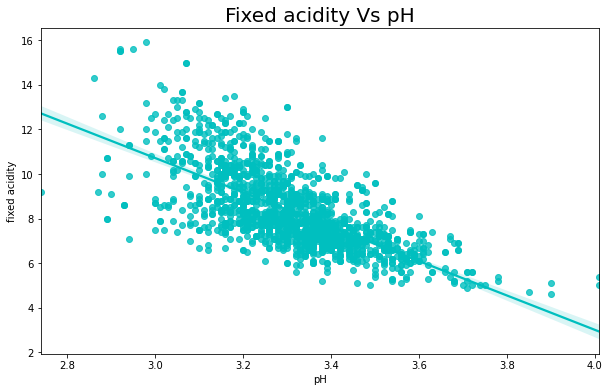

In [104]:
plt.figure(figsize=(10,6))
sns.regplot('pH', 'fixed acidity', color='c', data=df)
ax = plt.title('Fixed acidity Vs pH', fontsize = 20)

<font color='red'>R: </font>**Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".**

In [105]:
# Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol
df[["quality", "alcohol"]].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


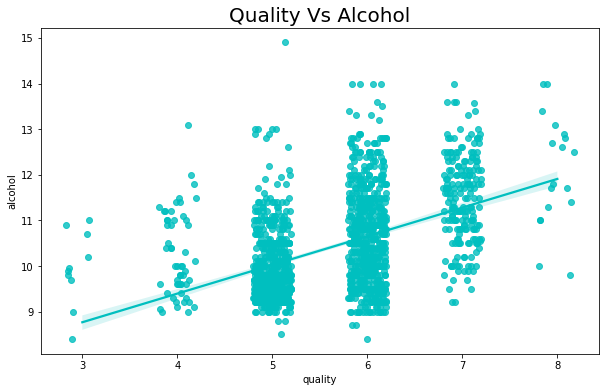

In [106]:
plt.figure(figsize=(10,6))
sns.regplot(x="quality", y="alcohol", x_jitter=0.2, color='c', data=df);
ax = plt.title("Quality Vs Alcohol", fontsize = 20)

<font color='red'>R: </font>**Quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).**

In [113]:
# Quantas instâncias existem para a qualidade do vinho igual a 5?
print(f'Qtds de vinhos com classificação 5: {len(df[df["quality"] == 5])}')

Qtds de vinhos com classificação 5: 681


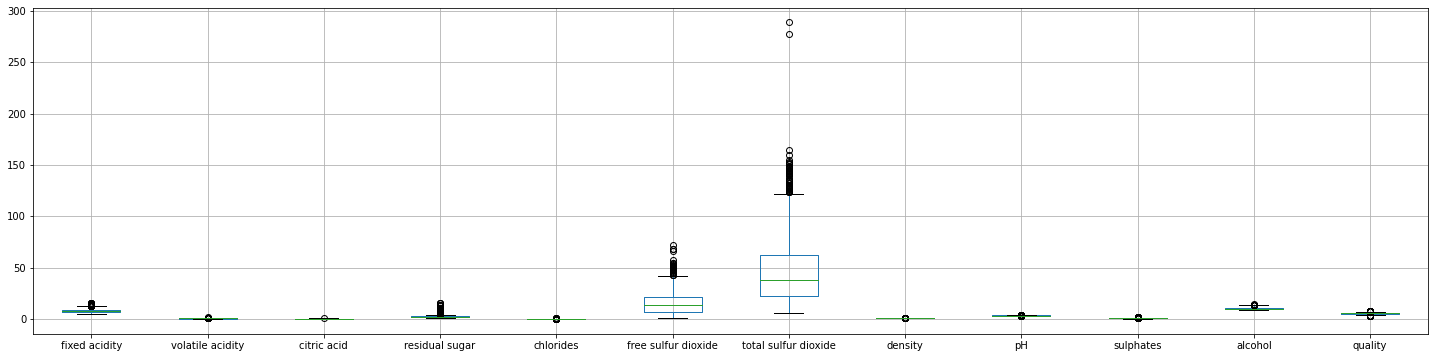

In [229]:
# Plotando um gráfico de boxplot das nossas variáveis
ax = df.boxplot(figsize = (25,6))

In [233]:
# Dados Estatísticos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [119]:
# Separando os dados
features = df.iloc[:,:-1]
label = df.iloc[:,-1]

In [234]:
print(f'Features: {features.shape}')
print(f'Label: {label.shape}')

Features: (1599, 11)
Label: (1599,)


In [133]:
# Normalizando nossos dados de entrada com os parâmetros default
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

features_scaler = Scaler.fit_transform(features)
new_dt = pd.DataFrame(features_scaler, columns=features.columns)
new_dt.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385


In [136]:
#  Qual é o menor valor para a variável "fixed acidity"?
print(f'Menor valor do "Fixed Acidity": {new_dt["fixed acidity"].min()}')

Menor valor do "Fixed Acidity": 0.0


In [138]:
# Dividindo nossos dados em treino e teste
from sklearn.model_selection import train_test_split as Split
X_train, X_test, Y_train, Y_test = Split(features_scaler, label, random_state=1, test_size=0.3)

## Construção do Modelo
* KNN
* Decision Tree
* RandomForest
* SVM
* MLP

#### KNeighbors Classifier

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train, Y_train)
predict = Knn.predict(X_test)
result_knn = accuracy_score(Y_test, predict)

print(f'Accuracy KNN: {round(result_knn * 100, 2)}%')

Accuracy KNN: 56.46%


#### Decision Tree Classifier

In [173]:
from sklearn.tree import DecisionTreeClassifier

Dtc = DecisionTreeClassifier()
Dtc.fit(X_train, Y_train)
predict = Dtc.predict(X_test)
result_dtc = accuracy_score(Y_test, predict)

print(f'Accuracy DecisionTreeClassifier: {round(result_dtc * 100, 2)}%')

Accuracy DecisionTreeClassifier: 58.75%


#### Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(max_depth=10, random_state=1)
Rfc.fit(X_train, Y_train)
predict = Rfc.predict(X_test)
result_rfc = accuracy_score(Y_test, predict)

print(f'Accuracy RandomForestClassifier: {round(result_rfc * 100, 2)}%')

Accuracy RandomForestClassifier: 67.92%


#### Support Vector Machine

In [183]:
from sklearn.svm import SVC

Svc = SVC(gamma='auto',kernel='rbf')
Svc.fit(X_train, Y_train)
predict = Svc.predict(X_test)
result_svc = accuracy_score(Y_test, predict)

print(f'Accuracy RandomForestClassifier: {round(result_svc * 100, 2)}%')

Accuracy RandomForestClassifier: 58.54%


#### MLPClassifier

In [196]:
from sklearn.neural_network import MLPClassifier

Mlpc = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
Mlpc.fit(X_train, Y_train)
predict = Mlpc.predict(X_test)
result_mlpc = accuracy_score(Y_test, predict)

print(f'Accuracy RandomForestClassifier: {round(result_mlpc * 100, 2)}%')

Accuracy RandomForestClassifier: 60.0%


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset? Grupo de escolhas da pergunta

**Vamos alterar apenas a variável label e separar novamente os dados**

In [209]:
new_label = label.copy()

In [211]:
# Replace nos dados
troca = {3:0, 4:0, 5:0,  # Ruins = 0
         6:1, 7:1, 8:1}  # Bons = 1

new_label.replace(troca, inplace=True)

In [214]:
new_label.unique()

array([0, 1])

In [215]:
## Separar os dados novamente
x_train, x_test, y_train, y_test = Split(features_scaler, new_label, random_state=1, test_size=0.3)

#### Random Forest Classifier

In [218]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(max_depth=10, random_state=1)
Rfc.fit(x_train, y_train)
predict = Rfc.predict(x_test)
result_rfc_new = accuracy_score(y_test, predict)

print(f'Accuracy RandomForestClassifier: {round(result_rfc_new * 100, 2)}%')

Accuracy RandomForestClassifier: 80.42%
